# Building machine learning model to predict Gender

### import graphlab (https://dato.com/products/create/)

In [1]:
import graphlab

A newer version of GraphLab Create (v1.8.2) is available! Your current version is v1.7.1.

You can use pip to upgrade the graphlab-create package. For more information see https://dato.com/products/create/upgrade.


In [2]:
# Firstly we removed some unrelevant for predictions features from training and test data:
# we removed V7 as it is closely connected with V4, and we removed V8 as it is closely connected with V5,
# we also removed V3 and V6 as dates are not very representative for prediction of Gender, 
# but we will include the mongth from V2 feature to our predictive variables.

# load training data:
column_type_hints=[str,str,long,long,float,float,float,float,float,float,float,
                   float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
data_train = graphlab.SFrame.read_csv('Train.csv',delimiter = ';',column_type_hints = column_type_hints)

[INFO] 1456261731 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_FILE to C:\Users\user\Anaconda3\envs\dato-env\lib\site-packages\certifi\cacert.pem
1456261731 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_DIR to 
This non-commercial license of GraphLab Create is assigned to raid.arfua@gmail.com and will expire on November 18, 2016. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-11872 - Server binary: C:\Users\user\Anaconda3\envs\dato-env\lib\site-packages\graphlab\unity_server.exe - Server log: C:\Users\user\AppData\Local\Temp\graphlab_server_1456261731.log.0
[INFO] GraphLab Server Version: 1.7.1


PROGRESS: Finished parsing file C:\Users\user\Anaconda3\Train.csv
PROGRESS: Parsing completed. Parsed 10862 lines in 0.093758 secs.


In [3]:
# show first 5 rows to see the data
data_train[:5]
# change type of V2 and V6 from string to datetime and covert it to mongths:
data_train['V2'] = data_train['V2'].str_to_datetime("%d-%m-%Y")
data_train['V2'] = data_train['V2'].split_datetime()['X.month']

In [4]:
# Look at very useful summary statistics with build-in function show() (means, summs, etc.)
data_train.show()
# remove columns V12 as it contains too many undentified values:
data_train.remove_column('V12')
print data_train[:5]

Canvas is accessible via web browser at the URL: http://localhost:53225/index.html
Opening Canvas in default web browser.
+-------------------------------+----+------+----+-----------+----------+
|            subs_id            | V2 |  V4  | V5 |     V9    |   V10    |
+-------------------------------+----+------+----+-----------+----------+
| 183721114dab116fbaf2a3204f... | 7  | 3508 | 15 | 0.8529772 |   0.0    |
| fd77444abf14537778af770392... | 3  | 3508 | 15 |  70.04804 | 67.23939 |
| de6302921ac156d0ce43c30236... | 9  | 3508 | 15 |  57.40215 | 67.29078 |
| d4f4cd3e77a3c1f2405726bb71... | 9  | 3508 | 15 |  53.61982 | 46.93018 |
| bd5623f4c1e0e134b33673aff0... | 9  | 515  | 15 |  177.1632 | 200.1843 |
+-------------------------------+----+------+----+-----------+----------+
+-----------+-----------+-----------+-----------+-----------+----------+
|    V11    |    V13    |    V14    |    V15    |    V16    |   V17    |
+-----------+-----------+-----------+-----------+-----------+-----

In [5]:
# load test data and do similar operations as with training set:
column_type_hints = column_type_hints[:-1]
data_test = graphlab.SFrame.read_csv('Test.csv',delimiter = ';',column_type_hints = column_type_hints)
data_test.remove_column('V12')
data_test['V2'] = data_test['V2'].str_to_datetime("%d-%m-%Y")
data_test['V2'] = data_test['V2'].split_datetime()['X.month']

PROGRESS: Finished parsing file C:\Users\user\Anaconda3\Test.csv
PROGRESS: Parsing completed. Parsed 4654 lines in 0.085513 secs.


In [6]:
data_test.show()

Canvas is accessible via web browser at the URL: http://localhost:53225/index.html
Opening Canvas in default web browser.


In [7]:
# create output variable to be a target for the logistic regression:
data_train['output'] = data_train['Gender'] == 'Female'
# it is equal to 1 when Gender is Female, so we will predict the probability that Gender is Female

In [8]:
# clean training data before doing logistic regression:
data_train = data_train.dropna()
data_train.show()


Canvas is accessible via web browser at the URL: http://localhost:53225/index.html
Opening Canvas in default web browser.


In [9]:
# Let's change data in column Gender, so for Female we put 1, and for Male we put 0:
# Let's create fetures excluding the subs_id, Gender, and output as a target
init_features = data_train.column_names()[1:-2]
init_log_model = graphlab.logistic_classifier.create(data_train, l2_penalty=10, l1_penalty=0,
                                                         features=init_features,
                                                         target='output')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: Logistic regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 8748
PROGRESS: Number of classes           : 2
PROGRESS: Number of feature columns   : 26
PROGRESS: Number of unpacked features : 26
PROGRESS: Number of coefficients    : 27
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+-------------------+---------------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-accuracy | Validation-accuracy |
PROGRESS: +-----------+----------+--------------+-------------------+---------------------+
PROGRESS: | 1         | 2        | 1.048129     | 0.610997          | 0.639344            |
PROGRESS: | 2         | 3        | 1.079382     |

In [10]:
# Let's look at our predictions:
predictions = init_log_model.predict(data_test, output_type='probability')
print predictions[:5]

[0.4117490167967732, 0.5726147849499341, 0.5260861671843733, 0.44585681043925574, 0.5903699402898221]


In [11]:
# Let's look at the summary statistics:
init_log_model.get('coefficients').print_rows(num_rows=27)
# we see that coefficients are small
# we see that even with the initial single logistic regression model we get 61% of accuracy, and 0.65 as AUC value:
print init_log_model.evaluate(data_train)

+-------------+-------+-------+--------------------+
|     name    | index | class |       value        |
+-------------+-------+-------+--------------------+
| (intercept) |  None |   1   |  -0.122602761625   |
|      V2     |  None |   1   |  0.00256182140304  |
|      V4     |  None |   1   | 6.17989756251e-09  |
|      V5     |  None |   1   | -0.00193034090786  |
|      V9     |  None |   1   | -0.00267289819282  |
|     V10     |  None |   1   |  2.9254631741e-07  |
|     V11     |  None |   1   | -0.00742837835357  |
|     V13     |  None |   1   |  0.0122019090191   |
|     V14     |  None |   1   | -0.00166760518016  |
|     V15     |  None |   1   | 5.95718657293e-05  |
|     V16     |  None |   1   | 3.26768350354e-05  |
|     V17     |  None |   1   | 8.89894161655e-05  |
|     V18     |  None |   1   | -0.000151318550948 |
|     V19     |  None |   1   |  0.00268242349628  |
|     V20     |  None |   1   | -0.00925600468425  |
|     V21     |  None |   1   | 0.000629207429

### now we will try to improve the model choosing the best possible lambda value
### it will be done using K-Fold Cross Validation
### (no need to create test set as 10% of training data, because all the validations will be performed on validation sets, and we want to keep a number of observations as high as possible)

In [12]:
train_valid_shuffled = graphlab.toolkits.cross_validation.shuffle(data_train, random_seed=1)

In [13]:
## this function will return us an average AUC value over all cross-validated models:

import numpy as np
def k_fold_cross_validation(k, l2_penalty, data, output_name, features_list):
    n = len(data)
    AUC_list = list()
    for i in xrange(k):
        start = (n*i)/k
        end = (n*(i+1))/k-1
        valid_set = data[start:end+1]
        train_set = data[:start].append(data[end+1:])
        model = graphlab.logistic_classifier.create(train_set, target = output_name, features = features_list, 
                                                    validation_set = None, l2_penalty=l2_penalty, verbose=False)
        AUC_list.append(model.evaluate(valid_set)['auc'])
        
    return (np.mean(AUC_list))

In [14]:
## now we will gather all the AUCs that we get through cross-validation

mean_AUC = list()
for l2_penalty in np.logspace(-1, 2, num=25):
    my_features = init_features
    AUC = k_fold_cross_validation(10, l2_penalty, train_valid_shuffled, 'output', my_features)
    mean_AUC.append(AUC)


In [15]:
print 'Average AUCs: ',mean_AUC    
print 'Maximum AUC: ', np.max(mean_AUC)

right_l2_penalty = (np.logspace(-1, 2, num=25))[mean_AUC.index(np.max(mean_AUC))]
print 'Right l2_penalty: ', right_l2_penalty

Average AUCs:  [0.65770024424536766, 0.6577030415874543, 0.65769620523257477, 0.65768936990324056, 0.65766984610793433, 0.65766136086530813, 0.65763921185508489, 0.65764086118373, 0.65765405729803805, 0.65765876083304975, 0.6576618631419322, 0.65770869839088486, 0.65774757472517387, 0.65780003334519954, 0.65784692075882678, 0.65791643742959727, 0.65798799630821014, 0.65806678257893436, 0.65812800548762296, 0.6580262896654282, 0.65783771608715047, 0.65754043588555022, 0.65713836047000529, 0.65650132503819969, 0.65545290514801713]
Maximum AUC:  0.658128005488
Right l2_penalty:  17.7827941004


In [16]:
print (np.logspace(-1, 2, num=25))

[   0.1           0.13335214    0.17782794    0.23713737    0.31622777
    0.4216965     0.56234133    0.74989421    1.            1.33352143
    1.77827941    2.37137371    3.16227766    4.21696503    5.62341325
    7.49894209   10.           13.33521432   17.7827941    23.71373706
   31.6227766    42.16965034   56.23413252   74.98942093  100.        ]


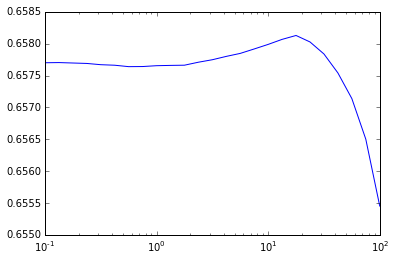

In [17]:
## We can build the graph l2_penalty vs averaged AUC

import matplotlib.pyplot as plt
%matplotlib inline

l2_penaltyv = np.logspace(-1, 2, num=25)
plt.xscale('log')
plt.plot(l2_penaltyv, mean_AUC,'-')

In [18]:
## Finally, we see that, while the difference is not really huge, we can set l2_penalty equal to 18 as the best choice:

final_log_model = graphlab.logistic_classifier.create(train_valid_shuffled, l2_penalty=right_l2_penalty, l1_penalty=0,
                                                         features=init_features,
                                                         target='output', verbose=False)

In [19]:
## Then our evaluations on the same set are 62% accuracy, and ~67% AUC

print final_log_model.evaluate(train_valid_shuffled)

{'f1_score': 0.6136637789231275, 'auc': 0.6642975284333044, 'recall': 0.575601728039498, 'precision': 0.6571160169093471, 'log_loss': 0.6596999820216666, 'roc_curve': Columns:
	threshold	float
	fpr	float
	tpr	float
	p	int
	n	int

Rows: 100001

Data:
+-----------+-----+-----+------+------+
| threshold | fpr | tpr |  p   |  n   |
+-----------+-----+-----+------+------+
|    0.0    | 1.0 | 1.0 | 4861 | 4375 |
|   1e-05   | 1.0 | 1.0 | 4861 | 4375 |
|   2e-05   | 1.0 | 1.0 | 4861 | 4375 |
|   3e-05   | 1.0 | 1.0 | 4861 | 4375 |
|   4e-05   | 1.0 | 1.0 | 4861 | 4375 |
|   5e-05   | 1.0 | 1.0 | 4861 | 4375 |
|   6e-05   | 1.0 | 1.0 | 4861 | 4375 |
|   7e-05   | 1.0 | 1.0 | 4861 | 4375 |
|   8e-05   | 1.0 | 1.0 | 4861 | 4375 |
|   9e-05   | 1.0 | 1.0 | 4861 | 4375 |
+-----------+-----+-----+------+------+
[100001 rows x 5 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns., 'confusion_matrix': Columns:
	targe

In [20]:
## Now we can make final predictions for the data_test:
final_test_predictions = final_log_model.predict(data_test,output_type='probability')

In [21]:
data_test['output_logistic'] = final_test_predictions

In [22]:
data_test['output_logistic']

dtype: float
Rows: 4654
[0.41736027437681666, 0.5765989054461393, 0.52880264944404, 0.4490549944848981, 0.5937798730168107, 0.46242734710107547, 0.5137456240127233, 0.41047283115955524, 0.4534178151985599, 0.37304260355957675, 0.5433202331111442, 0.49191212817658675, 0.4672544893978416, 0.4744247342900921, 0.43369173672486766, 0.371949519635425, 0.4628508160553968, 0.5728219983561674, 0.41954135806697473, 0.5450423071891822, 0.39240446710760274, 0.5276980285118229, 0.6020445586381112, 0.38782128966686824, 0.5229713243472947, 0.4506908129216484, 0.4950955805333594, 0.46200471448808766, 0.4259353502964359, 0.4714771575232524, 0.5154004113584221, 0.0, 0.5388368571823171, 0.4916718945505883, 0.6607923179254029, 0.42413520528943066, 0.5223465470604818, 0.4920070950487925, 0.42872937517399357, 0.5067203385678167, 0.5238916897311121, 0.6398920959775668, 0.7599068866424782, 0.7542588938525152, 0.44237736355235896, 0.4842523152189639, 0.7978383673267709, 0.49147585722384446, 0.5896357610629531,

# Now let's implement Random forest classifier and compare the results

In [23]:
init_features = data_train.column_names()[1:-2]
init_forest_model = graphlab.random_forest_classifier.create(data_train,
                                                         features=init_features,
                                                         target='output')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: Random forest classifier:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 8792
PROGRESS: Number of classes           : 2
PROGRESS: Number of feature columns   : 26
PROGRESS: Number of unpacked features : 26
PROGRESS: Starting Boosted Trees
PROGRESS: --------------------------------------------------------
PROGRESS:   Iter      Accuracy          Elapsed time
PROGRESS:         (training) (validation)
PROGRESS:      0  6.406e-001  5.991e-001        0.03s
PROGRESS:      1  6.570e-001  6.149e-001        0.06s
PROGRESS:      2  6.641e-001  6.216e-001        0.08s
PROGRESS:      3  6.597e-001  6.216e-001        0.09s
PROGRESS:      4  6.681e-001  6.261e-001        0.10s
PROGRESS:      5  6.686e-001  6.216e-001        0.12s
PROGRESS:      6  6.683e-001  6.26

In [24]:
## let's look at the evaluation statistics :
init_forest_model.evaluate(data_train)
## We can see that accuracy and AUC is about 5% higher

{'accuracy': 0.6665223040277176,
 'auc': 0.7282450289475985,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        0        |  1547 |
 |      0       |        0        |  2842 |
 |      0       |        1        |  1533 |
 |      1       |        1        |  3314 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.6827358879274824,
 'log_loss': 0.6181241750827191,
 'precision': 0.68372188982876,
 'recall': 0.6817527257765892,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+------+------+
 | threshold | fpr | tpr |  p   |  n   |
 +-----------+-----+-----+------+------+
 |    0.0    | 1.0 | 1.0 | 4861 | 4375 |
 |   1e-05   | 1.0 | 1.0 | 4861 | 4375 |
 |   2e-05   | 1.0 | 

In [25]:
## Now let's create test data as 10% of the training data to check random forests performance:
(train_valid, test) = data_train.random_split(.9, seed=1)
train_valid_shuffled = graphlab.toolkits.cross_validation.shuffle(train_valid, random_seed=1)

In [26]:
## not let's create new cross-validation function to measure how random_forest perform :
def k_fold_cross_validation_forest(k, data, output_name, features_list):
    n = len(data)
    AUC_list = list()
    for i in xrange(k):
        start = (n*i)/k
        end = (n*(i+1))/k-1
        valid_set = data[start:end+1]
        train_set = data[:start].append(data[end+1:])
        model = graphlab.random_forest_classifier.create(train_set, target = output_name, features = features_list, verbose=False)
        AUC_list.append(model.evaluate(valid_set)['auc'])
        
    return (np.mean(AUC_list))

In [27]:
k_fold_cross_validation_forest(10,train_valid_shuffled,'output',init_features)

0.64948814239262953

In [28]:
final_forest_model = graphlab.random_forest_classifier.create(train_valid_shuffled,
                                                         features=init_features,
                                                         target='output')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: Random forest classifier:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 7896
PROGRESS: Number of classes           : 2
PROGRESS: Number of feature columns   : 26
PROGRESS: Number of unpacked features : 26
PROGRESS: Starting Boosted Trees
PROGRESS: --------------------------------------------------------
PROGRESS:   Iter      Accuracy          Elapsed time
PROGRESS:         (training) (validation)
PROGRESS:      0  6.092e-001  5.487e-001        0.02s
PROGRESS:      1  6.567e-001  5.914e-001        0.04s
PROGRESS:      2  6.683e-001  6.010e-001        0.06s
PROGRESS:      3  6.692e-001  5.986e-001        0.08s
PROGRESS:      4  6.676e-001  5.986e-001        0.10s
PROGRESS:      5  6.722e-001  5.962e-001        0.12s
PROGRESS:      6  6.782e-001  6.01

In [29]:
final_forest_model.evaluate(test)

{'accuracy': 0.6017410228509249,
 'auc': 0.6603021521212417,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        0        |  170  |
 |      0       |        0        |  238  |
 |      1       |        1        |  315  |
 |      0       |        1        |  196  |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.6325301204819277,
 'log_loss': 0.651582072111,
 'precision': 0.6164383561643836,
 'recall': 0.6494845360824743,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+-----+-----+
 | threshold | fpr | tpr |  p  |  n  |
 +-----------+-----+-----+-----+-----+
 |    0.0    | 1.0 | 1.0 | 485 | 434 |
 |   1e-05   | 1.0 | 1.0 | 485 | 434 |
 |   2e-05   | 1.0 | 1.0 | 485 | 

## as we see random forest does not perform much better than logistic regregression: accuracy 61%, AUC 65%.

In [30]:
# let's build final predictions:
final_test_predictions_forest = final_forest_model.predict(data_test,output_type='probability')

In [31]:
sum(abs(final_test_predictions_forest - final_test_predictions))

317.4382011427029

In [32]:
## it is not really big number when we have about 9 thousands of observations

In [33]:
## let's write final LOGISTIC predictions to the file:
data_test.export_csv('RaidArfua.csv',delimiter=';')

# Conclusion:
## we see that accuracy of basic logistic and random forest classifiers are not high
## it makes sense to make better feature selection and preparation
## it makes sense to try SVM classifier too